# Chapter 1 ベクトル

## 1.1 ベクトル

Juliaでのベクトルは1次元の配列オブジェクト`Array`で表される．ベクトルを作るには，要素をカンマかセミコロンで並べて`[]`でくくり，代入演算子`=`を使ってその配列に変数名を与える．`length`関数でサイズ（次元）が得られる．

In [1]:
x = [ -1.1, 0.0, 3.6, -7.2 ]

4-element Array{Float64,1}:
 -1.1
  0.0
  3.6
 -7.2

In [2]:
length(x)

4

In [3]:
y = [ -1.1; 0.0; 3.6; -7.2 ]  # セミコロンを使う場合

4-element Array{Float64,1}:
 -1.1
  0.0
  3.6
 -7.2

In [4]:
length(y)

4

Juliaの表示で`Array{Float64,1}`という部分は，この配列が1次元で，その要素が64ビット浮動小数点型であることを示している．

### よくあるミス

要素の間のカンマやセミコロンを忘れたり，`[]`ではなく`()`を使ってしまっても，Juliaではエラーにはならない．しかしベクトルとは違うものになってしまうので，注意が必要である．

In [5]:
a = [ 1 2 ]

1×2 Array{Int64,2}:
 1  2

In [6]:
b = ( 1, 2 )

(1, 2)

ここで`a`は行ベクトルであり，後で説明する．
`b`は2つのスカラからなるタプルもしくはリストである．


### インデキシング

ある要素$x_i$にアクセスするには`x[i]`と書く．ここで`i`はインデックスである（$n$次元ベクトルの場合，`i`の範囲は1から$n$までである）．配列のインデキシングを代入の左辺に使うと，その要素の値を変更することができる．

In [7]:
x = [ -1.1, 0.0, 3.6, -7.2 ];
x[3]

3.6

In [8]:
x[3] = 4.0;
x

4-element Array{Float64,1}:
 -1.1
  0.0
  4.0
 -7.2

特殊なインデックスとして，ベクトルの最後のインデックスを意味する`end`がある．上の例では，`x[end]`と`x[length(x)]`はどちらも最後の要素-7.2である．


### 代入とコピー

MatlabやOctaveのユーザーは，`x`が配列の場合の代入文`y = x`の振る舞いに驚くかもしれない．この式の意味は，`x`と名前がついた配列と同じものに新しい名前`y`をつける（参照）というものである．つまり配列`x`の新しいコピーを作ることはない．

In [9]:
x = [ -1.1, 0.0, 3.6, -7.2 ];
y = x;
x[3] = 4.0; # x[3]に代入するとy[3]も変わる
y

4-element Array{Float64,1}:
 -1.1
  0.0
  4.0
 -7.2

In [10]:
y[1] = 2.0;  # y[1]に代入するとx[1]も変わる
x

4-element Array{Float64,1}:
  2.0
  0.0
  4.0
 -7.2

配列の新しいコピーを作るには，`copy`関数を使わなければならない．

In [11]:
x = [ -1.1, 0.0, 3.6, -7.2 ];
y = copy(x);
x[3] = 4.0;
y

4-element Array{Float64,1}:
 -1.1
  0.0
  3.6
 -7.2

In [12]:
y[1] = 2.0;
x

4-element Array{Float64,1}:
 -1.1
  0.0
  4.0
 -7.2

### ベクトルの等価性

ベクトル同士が等しいかどうかを確認するには比較演算子`==`を用いる．2つのベクトル（配列）`a`と`b`が与えられた場合，Juliaの式`a == b`は，2つのベクトル（配列）が等しければ，つまり長さが等しく要素も同じであれば，`true`を返す．それ以外の場合は`false`を返す．

In [13]:
x = [ -1.1, 0.0, 3.6, -7.2 ];
y = copy(x);
y[3] = 4.0;
y == x

false

In [14]:
z = x;
z[3] = 4.0;
z == x

true

### スカラと1次元ベクトル

本書での数学的な記法では，1次元ベクトルはスカラと同じであるとみなしている．しかしJuliaでは，1次元ベクトルはスカラ（数値）とは異なる．つまりJuliaでは1次元ベクトル（配列）`[ 1.3 ]`と数値`1.3`は違うものである．

In [15]:
x = [ 1.3 ]

1-element Array{Float64,1}:
 1.3

In [16]:
y = 1.3

1.3

In [17]:
x == y

false

In [18]:
x[1] == y

true

最後の比較での`x[1]`は，`x`の最初の（そして唯一の）要素，つまり数値`1.3`を表している．


### ブロックベクトル（スタックベクトル）

Juliaでブロックベクトルをつくるには，`vcat`（垂直方向の連結）か，セミコロン演算子`;`を使う．この2つの方法で，$x=(1,-2)$と$y=(1,1,0)$からブロックベクトル$z=(x,y)$を作る方法を以下に示す．

In [19]:
x=[1,-2]; y=[1,1,0];
z = [ x; y ]  # セミコロンで連結

5-element Array{Int64,1}:
  1
 -2
  1
  1
  0

In [20]:
z = vcat(x, y)  # vcatで連結

5-element Array{Int64,1}:
  1
 -2
  1
  1
  0

数学的な記法と同様に，ベクトルとスカラを同時にスタックできる．例えば`[ 1; x; 0 ]`は$(1, x, 0)$となる．

### よくあるミス

Juliaには，ベクトルをスタックするように見えるがそうではない機能がいくつかある．例えば，`z = ( x, y )`は2つのベクトルのタプルまたはリストを作る．`z = [ x, y ]`は2つのベクトルからなる配列を作る．どちらもJuliaでは正しいが，スタックベクトル`[ x; y ]`とは違う．

### 部分ベクトルとスライシング

本書での数学的な記法と同様に，Juliaの式`r:s`はインデックスの範囲$r, r+1, \ldots, s$を表す（ここで`r`と`s`は正の整数であり，`r`のほうが小さいと仮定している）．本書では，$x_{r:s}$という記法は，ベクトル$x$のスライス（インデックスの範囲は$r$から$s$まで）を表す．Juliaでは，インデックスの範囲を指定して，ベクトルのスライス（部分ベクトル）を取り出すことができる．

In [21]:
x = [ 9, 4, 3, 0, 5 ];
y = x[2:4]

3-element Array{Int64,1}:
 4
 3
 0

In [22]:
x[4:5] = [ -2, -3 ];  # xの第4,5要素に代入
x

5-element Array{Int64,1}:
  9
  4
  3
 -2
 -3

### Juliaでの配列のインデキシング

Juliaのスライシングや部分ベクトル抽出は，本書で用いている一般的な数学的記法よりも柔軟なものである．例えば，インデックスの範囲の指定には3番目の引数がある．これはインデックスをどれだけ増やすかという増分である．例えば，インデックスの範囲指定に`1:2:5`とすると，$1,3,5$という数字のリストになる[^index_incr]()．これを使えば`x[1:2:5]`という式から`[9,3,5]`という3次元ベクトルが抽出できる．つまり上で定義した`x`の1番目，3番目，5番目の要素を抜き出した部分ベクトルである．またインデックスの範囲指定を降順に指定することもできる．あるベクトル`z`について`z[end:-1:1]`は`z`の要素を逆順にしたベクトルである．

[^index_incr](): （訳注）範囲の最初と最後を指定する`1:5`という通常の方法では1,2,3,4,5という数字のリストになる．増分を指定する`1:2:5`という指定では，3番目の引数は最初と最後の間にある`2`であり，1から5までを2ずつ増やす，という意味である．


### 1階差分ベクトル

スライシングを使って，$(n-1)$次元ベクトル$d$を作ってみよう．ここで$i=1,\ldots,n-1$について$d_i = x_{i+1} - x_i$であり，$x$は$n$次元ベクトルである．ベクトル$d$は$x$の（1階）差分ベクトルと呼ばれる．

In [23]:
x = [ 1, 0, 0, -2, 2 ];
d = x[2:end] - x[1:end-1]

4-element Array{Int64,1}:
 -1
  0
 -2
  4

### ベクトルのリスト

$n$次元ベクトルの順序付きリストは，本書では$a_1, \ldots, a_k$または$a^{(1)}, \ldots, a^{(k)}$，もしくは単純に$a, b, c$などと表記している．Juliaではベクトルのリストを表現する方法はいくつかある．リストの要素をカンマで区切って`[]`で囲えば，ベクトルの1次元配列になる．`()`で囲えばタプルまたはリストになる．

In [24]:
x = [ 1.0, 0 ];   y = [ 1.0, -1.0 ];   z = [ 0, 1.0];
list = [ x, y, z ]

3-element Array{Array{Float64,1},1}:
 [1.0, 0.0] 
 [1.0, -1.0]
 [0.0, 1.0] 

In [25]:
list[2]  # listの2番目の要素

2-element Array{Float64,1}:
  1.0
 -1.0

In [26]:
list = ( x, y, z )

([1.0, 0.0], [1.0, -1.0], [0.0, 1.0])

In [27]:
list[3]  # listの3番目の要素

2-element Array{Float64,1}:
 0.0
 1.0

ここで，配列の配列である2次元配列`[x, y, z]`と，ベクトルを連結した1次元配列`[x; y; z]`は違うので，注意してほしい．なお，ベクトルのリストから$i$番目のベクトルを取り出すには`list[i]`とする．$i$番目のベクトルの$j$番目の要素を取り出すには`list[i][j]`とする．


### ゼロベクトル

Juliaで$n$次元のゼロベクトルを作るには`zeros(n)`とする．

In [28]:
zeros(3)

3-element Array{Float64,1}:
 0.0
 0.0
 0.0

### 単位ベクトル

$i$番目の$n$次元単位ベクトル$e_i$を作るJuliaの組み込み関数はない．以下は$i=2, n=4$の場合に$e_i$を作るコードである．

In [29]:
i = 2; n = 4;
ei = zeros(n);   # ゼロベクトルを作る
ei[i] = 1;   # i番目の要素を1にする
ei

4-element Array{Float64,1}:
 0.0
 1.0
 0.0
 0.0

Juliaのインライン関数を使うと，以下のように$e_i$の関数を定義することもできる．

In [30]:
unit_vector(i,n) = [zeros(i-1); 1 ; zeros(n-i)]

unit_vector (generic function with 1 method)

In [31]:
unit_vector(2,4)

4-element Array{Float64,1}:
 0.0
 1.0
 0.0
 0.0

### 1ベクトル

$n$次元ベクトルで要素がすべて1のベクトルは，本書では$\boldsymbol{1}_n$または単に$\boldsymbol{1}$と表記する．Juliaでは`ones(n)`を使う．

In [32]:
ones(2)

2-element Array{Float64,1}:
 1.0
 1.0

### 乱数ベクトル

本書では確率の概念を扱わないため，乱数ベクトルを使うことはない．しかし，等価性やアルゴリズムの検証など，ランダムなベクトルを生成できれば有用な場合がある．Juliaでは`rand(n)`で，要素が0から1，長さが$n$の乱数ベクトルを生成する．この関数を呼び出したり評価するたびに，異なるベクトルが生成される．似たような関数に`randn(n)`がある．これは要素が正規分布（ガウス分布）から抽出された値を持つ$n$次元のベクトルである（`randn`の最後の`n`は正規分布の頭文字である）．この要素は正にも負にもなり，そのほとんどが1桁の範囲にある．これらの関数は毎回違うベクトルを返すことを覚えておくこと．以下のコードを実行しても表示される値は違うものになっている．

In [33]:
rand(2)

2-element Array{Float64,1}:
 0.6004607900253356
 0.6790068403593492

In [34]:
rand(2)

2-element Array{Float64,1}:
 0.3927167178119775  
 0.009436617639674516

In [35]:
rand(2)

2-element Array{Float64,1}:
 0.72214815527053  
 0.3014812454487741

### プロット

Juliaでプロットするためのパッケージはいくつか存在する．その一つが`Plots.jl`で，ページ？？で述べたように，Juliaのパッケージマネージャでインストールする必要がある．すでに`Plots`がインストールされていれば，コマンド`using Plots`でインポートすれば（少し時間がかかるかもしれない），Juliaで使うことができる．その後はJuliaのコマンドでプロットを作成したり操作したりすることができる．

例えば本書の図1.3に示す温度の時系列をプロットするためのコードは以下のものである．最後の行ではプロットをファイル`temperature.pdf`に保存している．この結果を図1.1に示す．

In [36]:
using Plots  # 1セッションにつき1回実行すればよい

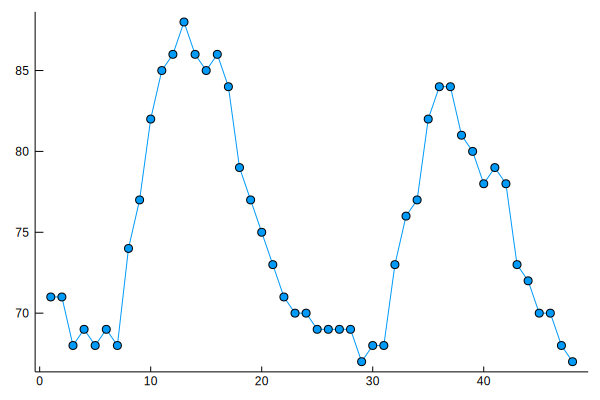

In [37]:
temps = [ 71, 71, 68, 69, 68, 69, 68, 74, 77, 82, 85, 86, 88, 86, 85, 86, 84, 79, 77, 75, 73, 71, 70, 70, 69, 69, 69, 69, 67, 68, 68, 73, 76, 77, 82, 84, 84, 81, 80, 78, 79, 78, 73, 72, 70, 70, 68, 67 ];
plot(temps, marker = :circle, legend = false, grid = false)

In [38]:
savefig("temperature.pdf")

![図1.1](fig1-1.pdf)
図1.1 2015年8月5-6日のロサンゼルス郊外の1時間毎の気温（午前12:47から午後11:47まで）

## 1.2 ベクトルの和

### ベクトルの和と差

同じサイズのベクトル`x`と`y`に対して，`x+y`と`x-y`はそれぞれ和と差を計算する．

In [39]:
[0, 7, 3] + [1, 2, 0] # ベクトルの和

3-element Array{Int64,1}:
 1
 9
 3

In [40]:
[1, 9] - [1, 1]  # ベクトルの差

2-element Array{Int64,1}:
 0
 8

## 1.3 ベクトルとスカラの積

### ベクトルとスカラの積と商

`a`がスカラ（数値）で`x`がベクトルの場合，スカラとベクトルの積を表す式は`a*x`または`x*a`である（Juliaでは実際には`2.0*x`を`2.0x`と書いてもよい．変数名は数字で始まることはないので，曖昧さは生じない）．ベクトルとスカラの商も同様に`x/a`と書く．あまり見かけない書き方ではあるが`a\x`と書いてもよい．

In [41]:
x = [ 0, 2, -1 ];
2.2 * x  # スカラとベクトルの積

3-element Array{Float64,1}:
  0.0
  4.4
 -2.2

In [42]:
x * 2.2  # ベクトルとスカラの積

3-element Array{Float64,1}:
  0.0
  4.4
 -2.2

In [43]:
x / 3  # ベクトルとスカラの商

3-element Array{Float64,1}:
  0.0               
  0.6666666666666666
 -0.3333333333333333

In [44]:
3 \ x  # スカラとベクトルの商

3-element Array{Float64,1}:
  0.0               
  0.6666666666666666
 -0.3333333333333333

### スカラとベクトルの和

Juliaでスカラ`a`とベクトル`x`の和を計算するには，`x .+ a`と書く．この演算子の前にあるドット`.`は，Juliaでは要素毎に演算子を適用することを意味する（詳しくは後述）．つまりスカラーをベクトルの各要素に足したり引いたりすることを意味する（これは一般的な数学の記法ではない．本書の記法では$x + a \boldsymbol{1}$となる．ここで$x$は$n$次元ベクトル，$a$はスカラー）．またJuliaではスカラーを左側に書いてベクトルとの和を計算することもできる．

In [45]:
[1.1, -3.7, 0.3] .- 1.4  # ベクトルとスカラの差

3-element Array{Float64,1}:
 -0.2999999999999998
 -5.1               
 -1.0999999999999999

In [46]:
0.7 .+ [1, -1]

2-element Array{Float64,1}:
  1.7                
 -0.30000000000000004

### 要素毎の演算

Juliaは演算をベクトルの各要素に適用するメソッドをサポートしている．そのためには，演算子の前にドット`.`をつける．例えば，同じ長さのベクトル`x`と`y`に対して，`x .* y`，`x ./ y`，`x .\ y`，`x .^ y`は要素毎のベクトル同士の演算である．これらはそれぞれ$x_i y_i, x_i / y_i, y_i / x_i, x_i^{y_i}$であり，$x$や$y$と同じ長さのベクトルである．

要素毎の商の例として，assetのリターンの3次元ベクトル`r`を，assetの最初と最終的な価格（のベクトル）から計算しよう（本書の？？ページを参照）．

In [47]:
p_initial = [ 22.15, 89.32, 56.77 ];
p_final = [ 23.05, 87.32, 57.13 ];
r = (p_final - p_initial) ./ p_initial

3-element Array{Float64,1}:
  0.04063205417607233 
 -0.02239140170174653 
  0.006341377488109907

### 要素毎のスカラ演算

要素毎の演算はスカラに対しても適用できる．この場合，このスカラは，適切な次元の1ベクトルにそのスカラをかけたベクトルと解釈される．前述したスカラとベクトルの和はその特殊な場合である．`a`がスカラで`x`がベクトルの場合，`x .^ a`は，$i$番目の要素が$x_i^a$であるベクトル，`a .^ x`は要素が$a^{x_i}$であるベクトルになる．スカラのベクトルの和と同様に，要素毎の演算のドット記法は数学的な記法ではないし，本書でも使用しない．

このドット記法は，Juliaでは要素毎に関数を適用するためにも使うことができる．関数名の「後」にドットを付けた場合，その関数を要素毎に適用することを意味する．例えば`x`がベクトルの場合，`sin.(x)`は`sin`を$x$の各要素に適用する．

等値演算子`==`（とその他の関係演算子`<`, `>=`など）は，その前にドットをつけることで要素毎の演算子になる．`x == y`は`x`と`y`が同じベクトルかどうかを評価する．`x .== y`は`x`と`y`の対応する要素が等しいかどうかを評価する．

In [48]:
w = [1,2,2]; z = [1,2,3];

In [49]:
w == z

false

In [50]:
w .== z

3-element BitArray{1}:
 1
 1
 0

これとJuliaのスライシングを組み合わせて，論理式を満たす要素を抜き出して部分ベクトルを作ることができる．例えば`x[abs.(x) .> 1]`は，絶対値が1以上の要素からなる部分ベクトルである．

In [51]:
x = [1.1, .5, -1.5, -0.3]

4-element Array{Float64,1}:
  1.1
  0.5
 -1.5
 -0.3

In [52]:
x[abs.(x) .> 1]

2-element Array{Float64,1}:
  1.1
 -1.5

ドット記法を代入式で使えば，ベクトルの複数の要素にスカラ値を代入することができる．

In [53]:
x = rand(4)

4-element Array{Float64,1}:
 0.8087179467101018
 0.1458455437512678
 0.8963425113738974
 0.3672779716597445

In [54]:
x[1:2] = [-1,1];
x

4-element Array{Float64,1}:
 -1.0               
  1.0               
  0.8963425113738974
  0.3672779716597445

In [55]:
x[2:3] .= 1.3;
x

4-element Array{Float64,1}:
 -1.0               
  1.3               
  1.3               
  0.3672779716597445

### 線形結合

スカラとベクトルの積と和を使って，線形結合もかける．

In [56]:
a =[1, 2];
b = [3, 4];
alpha = -0.5;
beta = 1.5;
c = alpha * a + beta * b

2-element Array{Float64,1}:
 4.0
 5.0

ここで少しJuliaの構文を説明しよう．係数のリストとベクトルのリストを引数に取り，線形結合を返す関数を作成する．リストはタプルや配列でもよい．

In [57]:
function lincomb(coeff, vectors)
n = length(vectors[1])  # ベクトルの長さ
a = zeros(n);
for i = 1:length(vectors)
  a = a + coeff[i] * vectors[i];
end
return a
end

lincomb (generic function with 1 method)

In [58]:
lincomb( (-0.5, 1.5), ( [1, 2], [3, 4]) )

2-element Array{Float64,1}:
 4.0
 5.0

もっと簡潔に関数を定義することもできる．

In [59]:
function lincomb(coeff, vectors)
return sum( coeff[i] * vectors[i] for i = 1:length(vectors) )
end

lincomb (generic function with 1 method)

### 等式のチェック

以下の分配法則を確認してみよう．
$$
\beta (a + b) = \beta a + \beta b
$$
これは任意の$n$次元ベクトル$a$と$b$，任意のスカラ$\beta$について成り立つ．ここで$n=3$として，$a, b, \beta$をランダムに生成してこの法則をチェックしてみる（この計算は，分配法則が成り立つことを証明するものではない．いくつかのベクトルについて成立することを示すだけである．しかし本当にこの等式が成立するのかを，ランダムなベクトルを与えて確かめてみるのもよいだろう）．以下では上で定義した`lincomb`を使う．

In [60]:
a = rand(3)

3-element Array{Float64,1}:
 0.9009058464405417
 0.7121564450225695
 0.49700444955487  

In [61]:
b = rand(3)

3-element Array{Float64,1}:
 0.5423096324264529   
 0.666570413133279    
 0.0006235565882983796

In [62]:
beta = randn()  # ランダムなスカラを生成

2.384118775054198

In [63]:
lhs = beta * (a + b)

3-element Array{Float64,1}:
 3.4407971196156373
 3.287048588200845 
 1.1864042724387136

In [64]:
rhs = beta * a + beta * b

3-element Array{Float64,1}:
 3.4407971196156373
 3.287048588200845 
 1.1864042724387136

2つのベクトル`lhs`（左辺）と`rhs`（右辺）の表示が同じだとしても，厳密に一致しているとは限らない．浮動小数点演算の微小な丸め誤差があるかもしれないからだ．乱数を使って等式を確認する場合には，左辺と右辺が厳密には一致しているかどうかではなく，非常に値が近いかどうかを確認するべきである．

## 1.4 内積

### 内積

$n$次元ベクトル$x$と$y$の内積は$x^T y$である．Julaでは，`x`と`y`の内積を`x' * y`と書く．

In [65]:
x = [ -1, 2, 2 ];
y = [ 1, 0, -3 ];
x'　*　y

-7

### NPV

例題として，キャッシュフローベクトル`c`の正味現在価値（Net Present Value; NPV）を計算してみよう．ここで`r`は期間毎の金利である．

In [66]:
c = [ 0.1, 0.1, 0.1, 1.1 ];  # キャッシュフローベクトル
n = length(c);
r = 0.05;  # 金利5%
d = (1 + r) .^ -(0:n-1)

4-element Array{Float64,1}:
 1.0               
 0.9523809523809523
 0.9070294784580498
 0.863837598531476 

In [67]:
NPV = c' * d

1.236162401468524

4行目では，ベクトル`d`を求めるためにスカラ`1+r`のべき乗を計算している．その指数部は配列`(0:n-1)`で，これは`[0,1,...,n-1]`に展開されている．

### 就学者人口

100次元ベクトル$x$が人口の年齢分布で，$i=1,\ldots,100$について，$x_i$が$i-1$歳の人口だとする．5歳から18歳までの人口は以下の式で計算できる．　
$$
x_6 + x_7 + \cdots + x_{18} + x_{19}
$$
これは$s^T x$で計算できる．ここで$s$は，$i=6,\ldots,19$の要素が1で，それ以外は0のベクトルである．Juliadで書くと以下のようになる．

```julia:
s = [ zeros(5); ones(14); zeros(81) ];
school_age_pop = s' * x
```

別の書き方でも同じことができる．たとえばベクトルの要素の総和を計算するJuliaの関数`sum`を使えば`sum(x[6:19])`となる．


## 1.5 ベクトル計算の計算量

### 浮動小数点演算

2つの値$a$と$b$に対して$(a+b)(a-b)=a^2-b^2$が成り立つ．計算機でこの右辺と左辺を計算すると，非常に小さい浮動小数点演算の丸め誤差のために，厳密に同じ値にはならない．しかしほとんど同じはずである．それを以下の例で見てみよう．

In [68]:
a = rand();
b = rand();

In [69]:
lhs = (a + b) * (a - b)

-0.34143736970072525

In [70]:
rhs = a^2 - b^2

-0.3414373697007253

In [71]:
lhs - rhs

5.551115123125783e-17

このように，左辺と右辺の値は同一ではないが，非常に近い．



### 計算時間

`@time`をコマンドの前につけると，Juliaのコマンドの計算時間を計ることができる．ただしマイクロ秒（$10^{-6}秒）などの超短時間を計測できるほどには正確ではない．また2回目以降のコマンドの実行は速くなる可能性があるので，何度も実行して計測するべきである．

In [72]:
a = randn(10^5); 
b = randn(10^5);

In [73]:
@time a' * b

  0.000116 seconds (6 allocations: 192 bytes)


-362.4558365814087

In [74]:
@time a' * b

  0.000100 seconds (6 allocations: 192 bytes)


-362.4558365814087

In [75]:
c = randn(10^6); 
d = randn(10^6);

In [76]:
@time c' * d

  0.001048 seconds (6 allocations: 192 bytes)


335.51437076936844

In [77]:
@time c' * d

  0.001080 seconds (6 allocations: 192 bytes)


335.51437076936844

1つ目は長さ$10^5$のベクトルの内積で，およそ0.00017秒かかっている．2つ目の（10倍の）長さ$10^6$のベクトルの内積はおよそ0.0018秒で，10倍程度長い．これは内積計算の計算量（$2n-1$flops）から予想されることである．この計算を行った計算機の性能は，およそ1秒あたり$2\cdot 10^6 / 0.001765$flops，つまりおよそ1 Gflops/sである．非常に粗いが，これが計算時間と計算速度の見積もりである．

### スパースベクトル

Juliaでスパースベクトルを生成したり処理するためのパッケージは`SparseArrays`である．これを使うためにはインストールする必要がある（ページ＊＊＊参照）．

スパースベクトルは，スパースな配列（非ゼロ要素のみを保持する配列）として保存されている．Juliaでスパースベクトルを作るには，インデックスと値のリストを`sparsevec`関数に渡せばよい．また最初にスパースなゼロベクトルを（`spzeros(n)`を使って）作り，それから非ゼロ要素を代入することもできる．非スパースベクトル`x`からスパースベクトルを作るには`sparse(x)`とする．`nnz(x)`とすると，スパースベクトルの非ゼロ要素の個数が得られる．スパースベクトルは，期待通りにオーバーロードされている．例えば，普通のベクトルの演算がそのまま使えるし，必要に応じて非スパースベクトルから自動的に型変換が行われる．

In [78]:
using SparseArrays

In [79]:
a = sparsevec( [ 123456, 123457 ], [ 1.0, -1.0 ], 10^6 )

1000000-element SparseVector{Float64,Int64} with 2 stored entries:
  [123456 ]  =  1.0
  [123457 ]  =  -1.0

In [80]:
length(a)

1000000

In [81]:
nnz(a)

2

In [82]:
b = randn(10^6);  # 通常の（非スパース）ベクトル

In [83]:
@time 2　*　a;

  0.045867 seconds (182.76 k allocations: 9.356 MiB, 11.38% gc time)


In [84]:
@time 2　*　a;  # 計算速い！

  0.000003 seconds (7 allocations: 384 bytes)


In [85]:
@time 2　*　b;

  0.005737 seconds (99 allocations: 7.635 MiB)


In [86]:
@time 2　*　b;

  0.003967 seconds (6 allocations: 7.630 MiB)


In [87]:
@time a' * b;

  0.015132 seconds (47.05 k allocations: 2.559 MiB)


In [88]:
@time a' * b; # 計算は速い！

  0.000003 seconds (6 allocations: 192 bytes)


In [89]:
@time b' * b;

  0.000390 seconds (6 allocations: 192 bytes)


In [90]:
@time b' * b;

  0.000443 seconds (6 allocations: 192 bytes)


In [91]:
@time c = a + b;

  0.258088 seconds (1.35 M allocations: 99.592 MiB, 9.88% gc time)


In [92]:
@time c = a + b;

  0.024464 seconds (21 allocations: 30.518 MiB, 9.39% gc time)


最後の行では，スパースベクトル`a`が自動的に普通のベクトル（配列）に型変換され，普通のベクトル`b`との和が計算されている．その結果は，（長さ$10^6$の）普通のベクトルである．